In [7]:
from keras.datasets import cifar10

In [8]:
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
X_train, x_test = X_train/255, x_test/255

# Targets are 2D array
Y_train, y_test = Y_train.flatten(), y_test.flatten()

In [19]:
X_train[0].shape

(32, 32, 3)

In [11]:
Y_train.shape

(50000,)

In [13]:
# number of Classes
K = len(set(Y_train))
K

10

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.activations import relu, softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=2, activation=relu, input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), strides=2, activation=relu))
model.add(Conv2D(128, (3, 3), strides=2, activation=relu))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(300, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(K, activation=softmax))

In [20]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [21]:
r = model.fit(
    X_train,
    Y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5462 - accuracy: 0.4369 - val_loss: 1.2779 - val_accuracy: 0.5356
Epoch 2/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2315 - accuracy: 0.5582 - val_loss: 1.1167 - val_accuracy: 0.6090
Epoch 3/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0812 - accuracy: 0.6154 - val_loss: 1.0245 - val_accuracy: 0.6369
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9704 - accuracy: 0.6560 - val_loss: 1.0086 - val_accuracy: 0.6389
Epoch 5/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8809 - accuracy: 0.6869 - val_loss: 0.9157 - val_accuracy: 0.6737


In [22]:
import matplotlib.pyplot as plt

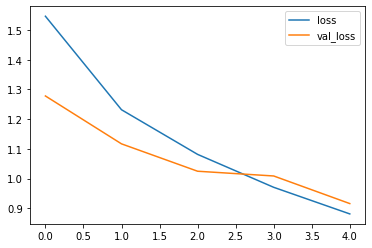

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

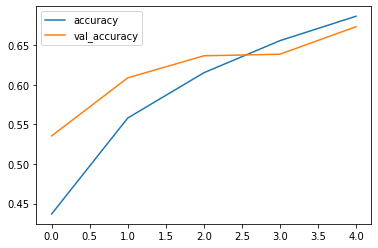

In [24]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()